# Mini Project: Dynamic Programming

In this notebook, you will write your own implementations of many classical dynamic programming algorithms.  

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

### Part 0: Explore FrozenLakeEnv

Use the code cell below to create an instance of the [FrozenLake](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py) environment.

### First, download and add code to L114 in frozenlake.py
    # obtain one-step dynamics for dynamic programming setting
    self.P = P

In [1]:
from frozenlake import FrozenLakeEnv

# QA: why is_slippery=False does not finish policy_iteration?
env = FrozenLakeEnv(is_slippery=True)

In [2]:
env

The agent moves through a $4 \times 4$ gridworld, with states numbered as follows:
```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
```
and the agent has 4 potential actions:
```
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
```

Thus, $\mathcal{S}^+ = \{0, 1, \ldots, 15\}$, and $\mathcal{A} = \{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
# print the state space and action space
print(env.observation_space)
print(env.action_space)

# print the total number of states and actions
print(env.nS)
print(env.nA)

Discrete(16)
Discrete(4)
16
4


Dynamic programming assumes that the agent has full knowledge of the MDP.  We have already amended the `frozenlake.py` file to make the one-step dynamics accessible to the agent.  

Execute the code cell below to return the one-step dynamics corresponding to a particular state and action.  In particular, `env.P[1][0]` returns the the probability of each possible reward and next state, if the agent is in state 1 of the gridworld and decides to go left.

Each entry takes the form 
```
prob, next_state, reward, done
```
where: 
- `prob` details the conditional probability of the corresponding (`next_state`, `reward`) pair, and
- `done` is `True` if the `next_state` is a terminal state, and otherwise `False`.

Thus, we can interpret `env.P[1][0]` as follows:
$$
\mathbb{P}(S_{t+1}=s',R_{t+1}=r|S_t=1,A_t=0) = \begin{cases}
               \frac{1}{3} \text{ if } s'=1, r=0\\
               \frac{1}{3} \text{ if } s'=0, r=0\\
               \frac{1}{3} \text{ if } s'=5, r=0\\
               0 \text{ else}
            \end{cases}
$$

Feel free to change the code cell above to explore how the environment behaves in response to other (state, action) pairs.

In [4]:
env.P[1][0]  # (state, action) -> (prob, next_state, reward, done)

[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]

In [5]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

### Part 1: Iterative Policy Evaluation

In this section, you will write your own implementation of iterative policy evaluation.

Your algorithm should accept four arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the estimate has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s` under the input policy.

Please complete the function in the code cell below.

In [6]:
import numpy as np


# QA: do we consider terminal states? like H or G?
def policy_evaluation(env, policy, gamma=1, theta=1e-8):    
    print('\n\npolicy_evaluation start')
    print('policy\n', policy)
    
    V = np.zeros(env.nS) 
    
    ## TODO: complete the function
    evaluation_count = 0    
    while True:
        evaluation_count += 1
        
        max_delta = 0                    
        for s in range(env.nS):    
            new_v_s = 0

            for a, prob_a_given_s in enumerate(policy[s]):
                if prob_a_given_s > 0:                    
                    one_step_dynamics_a_given_s = env.P[s][a]
                    for one_step_dynamic in one_step_dynamics_a_given_s:            
                        prob_next_s_r_given_s_a, next_s, reward, done = one_step_dynamic
                        if prob_next_s_r_given_s_a > 0:
                            new_v_s += prob_a_given_s * prob_next_s_r_given_s_a * (reward + gamma * V[next_s])
                            # print('new_v_s = ', new_v_s, 'next_s_r_given_s_a', next_s, reward, s, a,'\n')                                            
#                         else:
#                             print('prob_next_s_r_given_s_a =', prob_next_s_r_given_s_a, 'next_s =', next_s, 'reward = ', reward, 's =', s, 'a =', a, ', skip')
#                 else:    
#                     print('prob_a_given_s = ', prob_a_given_s, 'a =', a, 's =', s, ', skip')
            
            # update max_delta
            delta_v_s = new_v_s - V[s]
            max_delta = np.max([max_delta, np.abs(delta_v_s)])            
            
            # update V[s]
            V[s] = new_v_s
#             print('evaluation_count =', evaluation_count, ', new_v_s = ', new_v_s, 'next_s_r_given_s_a', next_s, reward, s, a,'\n')                                                            

        print('policy_evaluation running, evaluation_count =', evaluation_count, ', V =', V)                                                            
        if max_delta < theta:
            print('max_delta < theta', max_delta, theta, ', finish \n')
            break

    print('policy_evaluation finish, evaluation_count =', evaluation_count)            
    print('V', V)        
    return V

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that your `policy_evaluation` function satisfies the requirements outlined above (with four inputs, a single output, and with the default values of the input arguments unchanged).

In [7]:
import check_test

check_test.run_check('policy_evaluation_check', policy_evaluation)



policy_evaluation start
policy
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
policy_evaluation running, evaluation_count = 1 , V = [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.  ]
policy_evaluation running, evaluation_count = 2 , V = [0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.0625  0.      0.      0.0625  0.34375 0.     ]
policy_evaluation running, evaluation_count = 3 , V = [0.         0.         0.         0.         0.         0.
 0.015625   0.         0.         0.03125    0.09765625 0.
 0.         0.109375   0.38769531 0.        ]
policy_evaluation running, evaluation_count = 4 , V = [0.       

**<span style="color: green;">PASSED</span>**

We will evaluate the equiprobable random policy $\pi$, where $\pi(a|s) = \frac{1}{|\mathcal{A}(s)|}$ for all $s\in\mathcal{S}$ and $a\in\mathcal{A}(s)$.  

Use the code cell below to specify this policy in the variable `random_policy`.

In [8]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
random_policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

Run the next code cell to evaluate the equiprobable random policy and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

In [9]:
from plot_utils import plot_values

# evaluate the policy 
V = policy_evaluation(env, random_policy)
plot_values(V)



policy_evaluation start
policy
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
policy_evaluation running, evaluation_count = 1 , V = [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.  ]
policy_evaluation running, evaluation_count = 2 , V = [0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.0625  0.      0.      0.0625  0.34375 0.     ]
policy_evaluation running, evaluation_count = 3 , V = [0.         0.         0.         0.         0.         0.
 0.015625   0.         0.         0.03125    0.09765625 0.
 0.         0.109375   0.38769531 0.        ]
policy_evaluation running, evaluation_count = 4 , V = [0.       

/Users/rui/env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 600x600 with 1 Axes>

### Part 2: Obtain $q_\pi$ from $v_\pi$

In this section, you will write a function that takes the state-value function estimate as input, along with some state $s\in\mathcal{S}$.  It returns the **row in the action-value function** corresponding to the input state $s\in\mathcal{S}$.  That is, your function should accept as input both $v_\pi$ and $s$, and return $q_\pi(s,a)$ for all $a\in\mathcal{A}(s)$.

Your algorithm should accept four arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `s`: This is an integer corresponding to a state in the environment.  It should be a value between `0` and `(env.nS)-1`, inclusive.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `q`: This is a 1D numpy array with `q.shape[0]` equal to the number of actions (`env.nA`).  `q[a]` contains the (estimated) value of state `s` and action `a`.

Please complete the function in the code cell below.

In [10]:
def q_from_v(env, V, s, gamma=1):
#     print('\nq_from_v start')
    
    q = np.zeros(env.nA)
    
    ## TODO: complete the function
    one_step_dynamics_given_s = env.P[s]    
    for a, one_step_dynamics_given_s_a in one_step_dynamics_given_s.items():        
        q_a_s = 0        
        for one_step_dynamic in one_step_dynamics_given_s_a:
            prob_next_s_reward_given_s_a, next_s, reward, done = one_step_dynamic
            q_a_s += prob_next_s_reward_given_s_a * (reward + gamma * V[next_s])
    
        q[a] = q_a_s
    
#     print('q_from_v finish')    
#     print('q_{} ='.format(s), q)
    return q

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `q_from_v` function satisfies the requirements outlined above (with four inputs, a single output, and with the default values of the input arguments unchanged).

In [11]:
check_test.run_check('q_from_v_check', q_from_v)

**<span style="color: green;">PASSED</span>**

Run the code cell below to print the action-value function corresponding to the above state-value function.

In [12]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print("Action-Value Function:")
print(Q)

Action-Value Function:
[[0.0147094  0.01393978 0.01393978 0.01317015]
 [0.00852356 0.01163091 0.0108613  0.01550788]
 [0.02444514 0.02095298 0.02406033 0.01435346]
 [0.01047649 0.01047649 0.00698432 0.01396865]
 [0.02166487 0.01701828 0.01624865 0.01006281]
 [0.         0.         0.         0.        ]
 [0.05433538 0.04735105 0.05433538 0.00698432]
 [0.         0.         0.         0.        ]
 [0.01701828 0.04099204 0.03480619 0.04640826]
 [0.07020885 0.11755991 0.10595784 0.05895312]
 [0.18940421 0.17582037 0.16001424 0.04297382]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08799677 0.20503718 0.23442716 0.17582037]
 [0.25238823 0.53837051 0.52711478 0.43929118]
 [0.         0.         0.         0.        ]]


### Part 3: Policy Improvement

In this section, you will write your own implementation of policy improvement. 

Your algorithm should accept three arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.

Please complete the function in the code cell below.  You are encouraged to use the `q_from_v` function you implemented above.

In [65]:
def policy_improvement(env, V, gamma=1):
    print('\n\npolicy_improvement start')
    
    policy = np.zeros([env.nS, env.nA]) / env.nA
    
    ## TODO: complete the function
    for s in range(env.nS):
        q_given_s = q_from_v(env, V, s)
        
        # Solution 1: choose 1 action
#         a = np.argmax(q_given_s)
#         policy[s][a] = 1
        
        # Solution 2: equal prob to all valid actions
        max_actions = np.argwhere(q_given_s == np.amax(q_given_s)).flatten()
        policy[s][max_actions] = 1.0 / len(max_actions)
        
#         # The Solution 2 in official solution is 
#         # OPTION 2: construct a stochastic policy that puts equal probability on maximizing actions
#         best_a = np.argwhere(q==np.max(q)).flatten()
#         policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)        
        
    print('policy_improvement end')    
    print('policy =\n', policy)
    return policy

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `policy_improvement` function satisfies the requirements outlined above (with three inputs, a single output, and with the default values of the input arguments unchanged).

Before moving on to the next part of the notebook, you are strongly encouraged to check out the solution in **Dynamic_Programming_Solution.ipynb**.  There are many correct ways to approach this function!

In [66]:
check_test.run_check('policy_improvement_check', policy_improvement)



policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]


**<span style="color: green;">PASSED</span>**

### Part 4: Policy Iteration

In this section, you will write your own implementation of policy iteration.  The algorithm returns the optimal policy, along with its corresponding state-value function.

Your algorithm should accept three arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the policy evaluation step has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

Please complete the function in the code cell below.  You are strongly encouraged to use the `policy_evaluation` and `policy_improvement` functions you implemented above.

In [67]:
import copy

def policy_iteration(env, gamma=1, theta=1e-8):
    print('\n\npolicy_iteration start')
    
    policy = np.ones([env.nS, env.nA]) / env.nA
    
    ## TODO: complete the function
    iteration_count = 0
    policy_stable = False
    while not policy_stable:
        iteration_count += 1
        print('\n\npolicy_iteration run, iteration_count =', iteration_count)
    
        V = policy_evaluation(env, policy, gamma=gamma, theta=theta)
        improved_policy = policy_improvement(env, V, gamma=gamma)
        
        if np.allclose(policy, improved_policy):
            policy_stable = True
            
        policy = copy.deepcopy(improved_policy)

    print('policy_iteration finish, iteration_count =', iteration_count)
    print('policy \n', policy)
    print('V', V)    
    return policy, V

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `policy_iteration` function satisfies the requirements outlined above (with three inputs, two outputs, and with the default values of the input arguments unchanged).

In [68]:
check_test.run_check('policy_iteration_check', policy_iteration)



policy_iteration start


policy_iteration run, iteration_count = 1


policy_evaluation start
policy
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
policy_evaluation running, evaluation_count = 1 , V = [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.  ]
policy_evaluation running, evaluation_count = 2 , V = [0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.0625  0.      0.      0.0625  0.34375 0.     ]
policy_evaluation running, evaluation_count = 3 , V = [0.         0.         0.         0.         0.         0.
 0.015625   0.         0.         0.03125    0.09765625 0.
 0.         0.109375   0.38769531 0.     

policy_evaluation running, evaluation_count = 150 , V = [0.77854077 0.65694217 0.53546229 0.53535477 0.77878525 0.
 0.41405669 0.         0.77916203 0.77963403 0.70673328 0.
 0.         0.85305848 0.92652254 0.        ]
policy_evaluation running, evaluation_count = 151 , V = [0.77862226 0.65700891 0.53550929 0.53540628 0.77885652 0.
 0.41408086 0.         0.77921752 0.77966976 0.70675772 0.
 0.         0.85308359 0.92653538 0.        ]
policy_evaluation running, evaluation_count = 152 , V = [0.77870035 0.65707285 0.53555433 0.53545563 0.7789248  0.
 0.41410402 0.         0.77927069 0.779704   0.70678113 0.
 0.         0.85310766 0.92654768 0.        ]
policy_evaluation running, evaluation_count = 153 , V = [0.77877516 0.65713412 0.53559749 0.53550292 0.77899022 0.
 0.41412621 0.         0.77932164 0.77973681 0.70680356 0.
 0.         0.85313071 0.92655946 0.        ]
policy_evaluation running, evaluation_count = 154 , V = [0.77884685 0.65719282 0.53563884 0.53554822 0.7790529  0.
 0.41

policy_evaluation running, evaluation_count = 302 , V = [0.78048488 0.65853419 0.53658368 0.53658351 0.78048524 0.
 0.41463328 0.         0.78048581 0.78048652 0.70731619 0.
 0.         0.85365763 0.92682881 0.        ]
policy_evaluation running, evaluation_count = 303 , V = [0.780485   0.65853429 0.53658375 0.53658359 0.78048535 0.
 0.41463331 0.         0.78048589 0.78048657 0.70731623 0.
 0.         0.85365767 0.92682883 0.        ]
policy_evaluation running, evaluation_count = 304 , V = [0.78048512 0.65853438 0.53658381 0.53658367 0.78048545 0.
 0.41463335 0.         0.78048597 0.78048663 0.70731627 0.
 0.         0.85365771 0.92682884 0.        ]
policy_evaluation running, evaluation_count = 305 , V = [0.78048523 0.65853448 0.53658388 0.53658374 0.78048555 0.
 0.41463338 0.         0.78048605 0.78048667 0.7073163  0.
 0.         0.85365774 0.92682886 0.        ]
policy_evaluation running, evaluation_count = 306 , V = [0.78048534 0.65853456 0.53658394 0.53658381 0.78048565 0.
 0.41

 0.         0.85338092 0.92643493 0.        ]
policy_evaluation running, evaluation_count = 77 , V = [0.74881158 0.72450145 0.70761955 0.69903258 0.75634181 0.
 0.47860876 0.         0.76813033 0.78323933 0.72942768 0.
 0.         0.85435173 0.92692889 0.        ]
policy_evaluation running, evaluation_count = 78 , V = [0.75132165 0.72781422 0.71148878 0.70318465 0.75859793 0.
 0.48030549 0.         0.7699892  0.78458953 0.73060797 0.
 0.         0.85529005 0.92740631 0.        ]
policy_evaluation running, evaluation_count = 79 , V = [0.75374708 0.73101669 0.71523004 0.70719978 0.76077807 0.
 0.481946   0.         0.7717856  0.78589454 0.73174895 0.
 0.         0.85619697 0.92786776 0.        ]
policy_evaluation running, evaluation_count = 80 , V = [0.75609074 0.73411249 0.71884744 0.71108233 0.7628848  0.
 0.48353213 0.         0.77352165 0.78715586 0.73285192 0.
 0.         0.85707353 0.92831376 0.        ]
policy_evaluation running, evaluation_count = 81 , V = [0.75835543 0.73710512 

 0.         0.88219049 0.94109381 0.        ]
policy_evaluation running, evaluation_count = 229 , V = [0.82311097 0.82297369 0.82287827 0.82282972 0.82315306 0.
 0.52912644 0.         0.82321898 0.82330351 0.76450792 0.
 0.         0.88219593 0.94109658 0.        ]
policy_evaluation running, evaluation_count = 230 , V = [0.823125   0.82299232 0.8229001  0.82285318 0.82316568 0.
 0.52913601 0.         0.82322939 0.82331108 0.76451456 0.
 0.         0.8822012  0.94109926 0.        ]
policy_evaluation running, evaluation_count = 231 , V = [0.82313856 0.82301033 0.82292121 0.82287586 0.82317788 0.
 0.52914525 0.         0.82323945 0.8233184  0.76452097 0.
 0.         0.88220629 0.94110185 0.        ]
policy_evaluation running, evaluation_count = 232 , V = [0.82315167 0.82302773 0.8229416  0.82289777 0.82318966 0.
 0.52915419 0.         0.82324917 0.82332548 0.76452717 0.
 0.         0.8822112  0.94110435 0.        ]
policy_evaluation running, evaluation_count = 233 , V = [0.82316433 0.8230

policy_evaluation running, evaluation_count = 358 , V = [0.82352427 0.82352259 0.82352141 0.82352082 0.82352479 0.
 0.52940826 0.         0.8235256  0.82352664 0.76470345 0.
 0.         0.88235101 0.94117549 0.        ]
policy_evaluation running, evaluation_count = 359 , V = [0.82352444 0.82352281 0.82352168 0.82352111 0.82352494 0.
 0.52940838 0.         0.82352573 0.82352673 0.76470353 0.
 0.         0.88235108 0.94117552 0.        ]
policy_evaluation running, evaluation_count = 360 , V = [0.82352461 0.82352304 0.82352194 0.82352138 0.82352509 0.
 0.52940849 0.         0.82352585 0.82352682 0.76470361 0.
 0.         0.88235114 0.94117555 0.        ]
policy_evaluation running, evaluation_count = 361 , V = [0.82352477 0.82352325 0.82352219 0.82352165 0.82352524 0.
 0.5294086  0.         0.82352597 0.82352691 0.76470369 0.
 0.         0.8823512  0.94117558 0.        ]
policy_evaluation running, evaluation_count = 362 , V = [0.82352493 0.82352346 0.82352243 0.82352191 0.82352538 0.
 0.52

 0.         0.88235285 0.94117642 0.        ]
policy_evaluation running, evaluation_count = 447 , V = [0.82352916 0.82352908 0.82352903 0.823529   0.82352919 0.
 0.5294116  0.         0.82352923 0.82352928 0.76470577 0.
 0.         0.88235285 0.94117642 0.        ]
policy_evaluation running, evaluation_count = 448 , V = [0.82352917 0.82352909 0.82352904 0.82352901 0.8235292  0.
 0.5294116  0.         0.82352923 0.82352928 0.76470577 0.
 0.         0.88235285 0.94117643 0.        ]
policy_evaluation running, evaluation_count = 449 , V = [0.82352918 0.82352911 0.82352905 0.82352903 0.8235292  0.
 0.52941161 0.         0.82352924 0.82352929 0.76470577 0.
 0.         0.88235285 0.94117643 0.        ]
policy_evaluation running, evaluation_count = 450 , V = [0.82352919 0.82352912 0.82352906 0.82352904 0.82352921 0.
 0.52941161 0.         0.82352925 0.82352929 0.76470578 0.
 0.         0.88235286 0.94117643 0.        ]
policy_evaluation running, evaluation_count = 451 , V = [0.8235292  0.8235

**<span style="color: green;">PASSED</span>**

Run the next code cell to solve the MDP and visualize the output.  The optimal state-value function has been reshaped to match the shape of the gridworld.

**Compare the optimal state-value function to the state-value function from Part 1 of this notebook**.  _Is the optimal state-value function consistently greater than or equal to the state-value function for the equiprobable random policy?_

In [69]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)



policy_iteration start


policy_iteration run, iteration_count = 1


policy_evaluation start
policy
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
policy_evaluation running, evaluation_count = 1 , V = [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.  ]
policy_evaluation running, evaluation_count = 2 , V = [0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.0625  0.      0.      0.0625  0.34375 0.     ]
policy_evaluation running, evaluation_count = 3 , V = [0.         0.         0.         0.         0.         0.
 0.015625   0.         0.         0.03125    0.09765625 0.
 0.         0.109375   0.38769531 0.     

 0.         0.82551117 0.91244132 0.        ]
policy_evaluation running, evaluation_count = 61 , V = [0.69298    0.58687707 0.48610957 0.48127737 0.70396825 0.
 0.38868086 0.         0.72090222 0.74211547 0.68107922 0.
 0.         0.82668932 0.91304354 0.        ]
policy_evaluation running, evaluation_count = 62 , V = [0.69664275 0.58987647 0.4882223  0.48359234 0.70717108 0.
 0.38976717 0.         0.72339626 0.7437216  0.68217744 0.
 0.         0.82781815 0.91362057 0.        ]
policy_evaluation running, evaluation_count = 63 , V = [0.70015219 0.59275032 0.4902466  0.48581043 0.71023984 0.
 0.39080801 0.         0.7257859  0.7452605  0.68322969 0.
 0.         0.82889974 0.91417343 0.        ]
policy_evaluation running, evaluation_count = 64 , V = [0.70351474 0.59550389 0.49218617 0.48793567 0.71318016 0.
 0.39180529 0.         0.72807552 0.74673498 0.6842379  0.
 0.         0.82993605 0.91470316 0.        ]
policy_evaluation running, evaluation_count = 65 , V = [0.70673655 0.5981422  

 0.         0.8535631  0.92678048 0.        ]
policy_evaluation running, evaluation_count = 194 , V = [0.7801911  0.65829362 0.53641422 0.53639784 0.78022836 0.
 0.41454615 0.         0.78028577 0.7803577  0.70722811 0.
 0.         0.85356709 0.92678253 0.        ]
policy_evaluation running, evaluation_count = 195 , V = [0.78020352 0.65830379 0.53642139 0.53640569 0.78023922 0.
 0.41454983 0.         0.78029423 0.78036315 0.70723183 0.
 0.         0.85357092 0.92678448 0.        ]
policy_evaluation running, evaluation_count = 196 , V = [0.78021542 0.65831353 0.53642825 0.53641321 0.78024962 0.
 0.41455336 0.         0.78030233 0.78036836 0.7072354  0.
 0.         0.85357459 0.92678636 0.        ]
policy_evaluation running, evaluation_count = 197 , V = [0.78022682 0.65832287 0.53643483 0.53642041 0.78025959 0.
 0.41455674 0.         0.7803101  0.78037336 0.70723882 0.
 0.         0.8535781  0.92678815 0.        ]
policy_evaluation running, evaluation_count = 198 , V = [0.78023774 0.6583

policy_evaluation running, evaluation_count = 28 , V = [0.41331965 0.31841913 0.25509076 0.22343008 0.45711973 0.
 0.27780508 0.         0.52504877 0.61097885 0.58407208 0.
 0.         0.73465815 0.86603015 0.        ]
policy_evaluation running, evaluation_count = 29 , V = [0.42791967 0.33380985 0.2707769  0.23921235 0.47002939 0.
 0.28494966 0.         0.53535234 0.61802752 0.58966911 0.
 0.         0.73957194 0.86853403 0.        ]
policy_evaluation running, evaluation_count = 30 , V = [0.44195625 0.34884767 0.28627897 0.25490122 0.48244599 0.
 0.29198269 0.         0.54527528 0.62483878 0.5951185  0.
 0.         0.74431492 0.87094965 0.        ]
policy_evaluation running, evaluation_count = 31 , V = [0.45545283 0.36352649 0.30156889 0.27045711 0.49439137 0.
 0.2988958  0.         0.55483514 0.63142285 0.60042277 0.
 0.         0.74889581 0.87328182 0.        ]
policy_evaluation running, evaluation_count = 32 , V = [0.46843234 0.37784257 0.31662286 0.2858457  0.50588628 0.
 0.3056818

policy_evaluation running, evaluation_count = 223 , V = [0.82301595 0.8228475  0.82273042 0.82267084 0.8230676  0.
 0.52906165 0.         0.82314849 0.82325221 0.76446297 0.
 0.         0.88216028 0.94107844 0.        ]
policy_evaluation running, evaluation_count = 224 , V = [0.82303317 0.82287036 0.82275721 0.82269963 0.82308309 0.
 0.52907339 0.         0.82316126 0.8232615  0.76447111 0.
 0.         0.88216674 0.94108173 0.        ]
policy_evaluation running, evaluation_count = 225 , V = [0.82304981 0.82289246 0.8227831  0.82272745 0.82309805 0.
 0.52908474 0.         0.82317361 0.82327049 0.76447898 0.
 0.         0.88217299 0.9410849  0.        ]
policy_evaluation running, evaluation_count = 226 , V = [0.82306589 0.82291382 0.82280812 0.82275434 0.82311252 0.
 0.5290957  0.         0.82318554 0.82327917 0.76448659 0.
 0.         0.88217902 0.94108797 0.        ]
policy_evaluation running, evaluation_count = 227 , V = [0.82308143 0.82293446 0.82283231 0.82278033 0.8231265  0.
 0.52

 0.         0.88235282 0.94117641 0.        ]
policy_evaluation running, evaluation_count = 441 , V = [0.82352911 0.82352901 0.82352894 0.8235289  0.82352914 0.
 0.52941156 0.         0.82352919 0.82352925 0.76470574 0.
 0.         0.88235283 0.94117641 0.        ]
policy_evaluation running, evaluation_count = 442 , V = [0.82352912 0.82352902 0.82352896 0.82352892 0.82352915 0.
 0.52941156 0.         0.82352919 0.82352925 0.76470574 0.
 0.         0.88235283 0.94117641 0.        ]
policy_evaluation running, evaluation_count = 443 , V = [0.82352913 0.82352904 0.82352897 0.82352894 0.82352916 0.
 0.52941157 0.         0.8235292  0.82352926 0.76470575 0.
 0.         0.88235283 0.94117642 0.        ]
policy_evaluation running, evaluation_count = 444 , V = [0.82352914 0.82352905 0.82352899 0.82352895 0.82352917 0.
 0.52941158 0.         0.82352921 0.82352926 0.76470575 0.
 0.         0.88235284 0.94117642 0.        ]
policy_evaluation running, evaluation_count = 445 , V = [0.82352915 0.8235

### policy_improvement, solution 1:


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]] 



/Users/rui/env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


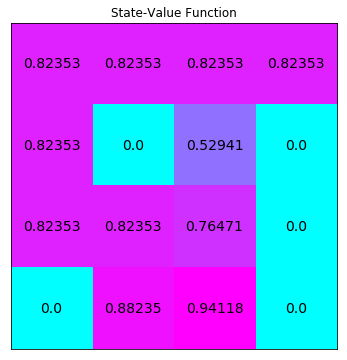

In [18]:
# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values(V_pi)

### policy_improvement, solution 2:



Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



/Users/rui/env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


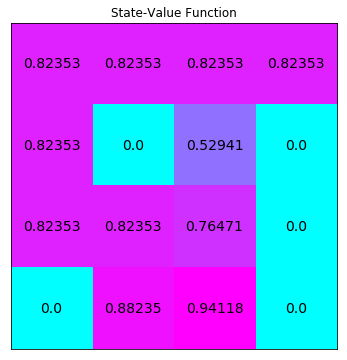

In [71]:
# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values(V_pi)

### Part 5: Truncated Policy Iteration

In this section, you will write your own implementation of truncated policy iteration.  

You will begin by implementing truncated policy evaluation.  Your algorithm should accept five arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `max_it`: This is a positive integer that corresponds to the number of sweeps through the state space (default value: `1`).
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

Please complete the function in the code cell below.

In [87]:
def truncated_policy_evaluation(env, policy, V, max_it=1, gamma=1):
    
    ## TODO: complete the function    
    print('\ntruncated_policy_evaluation start')
    print('policy\n', policy)
    print('V\n', V)
    
    ## TODO: complete the function
    evaluation_count = 0    
    while True:
        evaluation_count += 1
        
        max_delta = 0                    
        for s in range(env.nS):    
            new_v_s = 0

            for a, prob_a_given_s in enumerate(policy[s]):
                if prob_a_given_s > 0:                    
                    one_step_dynamics_a_given_s = env.P[s][a]
                    for one_step_dynamic in one_step_dynamics_a_given_s:            
                        prob_next_s_r_given_s_a, next_s, reward, done = one_step_dynamic
                        if prob_next_s_r_given_s_a > 0:
                            new_v_s += prob_a_given_s * prob_next_s_r_given_s_a * (reward + gamma * V[next_s])
                            # print('new_v_s = ', new_v_s, 'next_s_r_given_s_a', next_s, reward, s, a,'\n')                                            
#                         else:
#                             print('prob_next_s_r_given_s_a =', prob_next_s_r_given_s_a, 'next_s =', next_s, 'reward = ', reward, 's =', s, 'a =', a, ', skip')
#                 else:    
#                     print('prob_a_given_s = ', prob_a_given_s, 'a =', a, 's =', s, ', skip')
            
            # update max_delta
            delta_v_s = new_v_s - V[s]
            max_delta = np.max([max_delta, np.abs(delta_v_s)])            
            
            # update V[s]
            V[s] = new_v_s
#             print('evaluation_count =', evaluation_count, ', new_v_s = ', new_v_s, 'next_s_r_given_s_a', next_s, reward, s, a,'\n')                                                            

        print('truncated_policy_evaluation running, evaluation_count =', evaluation_count, ', V =', V)                                                            
        if evaluation_count >= max_it:
            print('evaluation_count >= max_it', evaluation_count, max_it, ', finish \n')
            break

    print('truncated_policy_evaluation finish, evaluation_count =', evaluation_count)            
    print('V', V)        
    return V


Next, you will implement truncated policy iteration.  Your algorithm should accept five arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `max_it`: This is a positive integer that corresponds to the number of sweeps through the state space (default value: `1`).
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used for the stopping criterion (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

Please complete the function in the code cell below.

In [106]:
import copy

def truncated_policy_iteration(env, max_it=1, gamma=1, theta=1e-8):
    ## TODO: complete the function
    print('\ntruncated_policy_iteration start')
    
    V = np.zeros(env.nS)
    
#     policy = np.zeros([env.nS, env.nA]) / env.nA
    policy = np.ones([env.nS, env.nA]) / env.nA

    iteration_count = 0
    while True:
        iteration_count += 1

        policy = policy_improvement(env, V, gamma=gamma)        
        
        V_old = copy.deepcopy(V)
        V = truncated_policy_evaluation(env, policy, V, max_it=max_it, gamma=gamma)                        

        delta_V = np.amax(np.abs(V - V_old))
#         print('truncated_policy_iteration run, iteration_count =', iteration_count, ', delta_V', delta_V)        
        if delta_V < theta:        
            break
            
    print('truncated_policy_iteration finish, iteration_count =', iteration_count)
    print('policy \n', policy)
    print('V', V)    
    return policy, V

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `truncated_policy_iteration` function satisfies the requirements outlined above (with four inputs, two outputs, and with the default values of the input arguments unchanged).

In [107]:
check_test.run_check('truncated_policy_iteration_check', truncated_policy_iteration)


truncated_policy_iteration start


policy_improvement start
policy_improvement end
policy =
 [[0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.25       0.25       0.25       0.25      ]]

truncated_policy_evaluation start
policy
 [[0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.2

 0.         0.7830053  0.89064244 0.        ]
evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.54771914 0.48229344 0.43851672 0.41660518 0.57717933 0.
 0.35916661 0.         0.6228089  0.68047147 0.64285336 0.
 0.         0.7830053  0.89064244 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1. 


truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.72023454 0.68757368 0.66495785 0.65346829 0.73071122 0.
 0.4598528  0.         0.74709209 0.76805355 0.71626317 0.
 0.         0.84380157 0.92156157 0.        ]
truncated_policy_evaluation running, evaluation_count = 1 , V = [0.72372677 0.6920861  0.67017075 0.65903578 0.73384336 0.
 0.46214464 0.         0.749663   0.76990925 0.71787182 0.
 0.         0.8450908  0.92221746 0.        ]
evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.72372677 0.6920861  0.67017075 0.65903578 0.73384336 0.
 0.46214464 0.         0.749663  

evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.78254297 0.76916276 0.75986794 0.75513947 0.78667053 0.
 0.50151183 0.         0.79313315 0.80141769 0.74533848 0.
 0.         0.86698533 0.93335708 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.2

 0.         0.87682807 0.93836527 0.        ]
truncated_policy_evaluation running, evaluation_count = 1 , V = [0.80929765 0.80463075 0.80138737 0.79973708 0.8107294  0.
 0.51970917 0.         0.81297158 0.8158466  0.75797368 0.
 0.         0.87701332 0.93845953 0.        ]
evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.80929765 0.80463075 0.80138737 0.79973708 0.8107294  0.
 0.51970917 0.         0.81297158 0.8158466  0.75797368 0.
 0.         0.87701332 0.93845953 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation sta

policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.81875126 0.81718368 0.8160942  0.81553984 0.8192319  0.
 0.52615372 0.         0.81998462 0.82094982 0.76244537 0.
 0.         0.8805601  0.94026423 0.        ]
truncated_policy_ev

 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82162684 0.82100263 0.82056881 0.82034806 0.82181822 0.
 0.52811445 0.         0.82211794 0.82250226 0.76380578 0.
 0.         0.88163906 0.94081323 0.        ]
truncated_policy_evaluation running, evaluation_count = 1 , V = [0.82169063 0.82108736 0.82066808 0.82045473 0.8218756  0.
 0.52815795 0.         0.82216527 0.8225367  0.76383596 0.
 0.         0.881663   0.94082541 0.        ]
evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.82169063 0.82108736 0.82066808 0.82045473 0.8218756  0.
 0.528157

 0.         0.88208743 0.94104137 0.        ]
evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.82282179 0.82258963 0.82242828 0.82234618 0.82289297 0.
 0.52892926 0.         0.82300445 0.82314739 0.76437111 0.
 0.         0.88208743 0.94104137 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1. 

policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82329182 0.82321387 0.8231597  0.82313213 0.82331572 0.
 0.52924976 0.         0.82335315 0.82340114 0.76459348 0.
 0.         0.88226379 0.94113111 0.        ]
truncated_policy_ev

policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82344401 0.82341599 0.82339652 0.82338661 0.8234526  0.
 0.52935353 0.         0.82346605 0.82348331 0.76466548 0.
 0.         0.8823209  0.94116017 0.        ]
truncated_policy_ev

evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.8235017  0.82349261 0.82348629 0.82348307 0.82350449 0.
 0.52939287 0.         0.82350885 0.82351445 0.76469277 0.
 0.         0.88234254 0.94117118 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.2

 0.         0.88234957 0.94117475 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82352042 0.82351747 0.82351542 0.82351437 0.82352132 0.
 0.52940563 0.         0.82352274 0.82352456 0.7647

 0.         0.8823514  0.94117569 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82352531 0.82352396 0.82352303 0.82352255 0.82352572 0.
 0.52940897 0.         0.82352637 0.8235272  0.7647

 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82352808 0.82352764 0.82352734 0.82352718 0.82352821 0.
 0.52941086 0.         0.82352842 0.82352869 0.76470525 0.
 0.         0.88235244 0.94117622 0.        ]
truncated_policy_evaluation running, evaluation_cou

 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82352884 0.82352866 0.82352853 0.82352846 0.8235289  0.
 0.52941138 0.         0.82352899 0.82352911 0.76470561 0.
 0.         0.88235273 0.94117636 0.        ]
truncated_policy_evaluation running, evaluation_cou

truncated_policy_evaluation running, evaluation_count = 1 , V = [0.82352913 0.82352904 0.82352898 0.82352895 0.82352916 0.
 0.52941158 0.         0.82352921 0.82352926 0.76470575 0.
 0.         0.88235284 0.94117642 0.        ]
evaluation_count >= max_it 1 1 , finish 

truncated_policy_evaluation finish, evaluation_count = 1
V [0.82352913 0.82352904 0.82352898 0.82352895 0.82352916 0.
 0.52941158 0.         0.82352921 0.82352926 0.76470575 0.
 0.         0.88235284 0.94117642 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   

**<span style="color: green;">PASSED</span>**

Run the next code cell to solve the MDP and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

Play with the value of the `max_it` argument.  Do you always end with the optimal state-value function?

In [109]:
policy_tpi, V_tpi = truncated_policy_iteration(env, max_it=2)


truncated_policy_iteration start


policy_improvement start
policy_improvement end
policy =
 [[0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.25       0.25       0.25       0.25      ]]

truncated_policy_evaluation start
policy
 [[0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.2

V [0.72559659 0.69450484 0.67296658 0.66202255 0.73552057 0.
 0.46337365 0.         0.75103995 0.77090346 0.71873406 0.
 0.         0.84578153 0.92256886 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 

V [0.79858522 0.79041528 0.78473803 0.7818495  0.80109536 0.
 0.51241288 0.         0.80502612 0.81006597 0.75290967 0.
 0.         0.87299576 0.9364153  0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 



policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.81867737 0.81708555 0.81597922 0.8154163  0.81916544 0.
 0.52610333 0.         0.81992981 0.82090993 0.76241042 0.
 0.         0.88053238 0.94025012 0.  

 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
V
 [0.82258544 0.82227574 0.82206049 0.82195097 0.8226804  0.
 0.5287681  0.         0.8228291  0.82301979 0.76425929 0.
 0.         0.88199875 0.94099625 0.        ]
truncated_policy_evaluation running, evaluation_count = 1 , V = [0.82261709 0.82231777 0.82210974 0.82200389 0.82270886 0.
 0.52878968 0.         0.82285258 0.82303687 0.76427427 0.
 0.         0.88201062 0.94100229 0.        ]
truncated_policy_evaluation running, evaluation_count = 2 , V = [0.82264768 0.8223584  0.82215734 0.82205504 0.82273638 0.
 0.52881054 0.         0.82287528 0.82305339 0

truncated_policy_evaluation finish, evaluation_count = 2
V [0.823423   0.82338808 0.82336382 0.82335147 0.8234337  0.
 0.5293392  0.         0.82345046 0.82347196 0.76465554 0.
 0.         0.88231301 0.94115615 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.  

truncated_policy_evaluation running, evaluation_count = 2 , V = [0.82351566 0.82351115 0.82350802 0.82350642 0.82351704 0.
 0.52940239 0.         0.82351921 0.82352199 0.76469938 0.
 0.         0.88234778 0.94117385 0.        ]
evaluation_count >= max_it 2 2 , finish 

truncated_policy_evaluation finish, evaluation_count = 2
V [0.82351566 0.82351115 0.82350802 0.82350642 0.82351704 0.
 0.52940239 0.         0.82351921 0.82352199 0.76469938 0.
 0.         0.88234778 0.94117385 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   

truncated_policy_evaluation running, evaluation_count = 2 , V = [0.82352565 0.82352442 0.82352356 0.82352312 0.82352603 0.
 0.5294092  0.         0.82352662 0.82352738 0.7647041  0.
 0.         0.88235153 0.94117575 0.        ]
evaluation_count >= max_it 2 2 , finish 

truncated_policy_evaluation finish, evaluation_count = 2
V [0.82352565 0.82352442 0.82352356 0.82352312 0.82352603 0.
 0.5294092  0.         0.82352662 0.82352738 0.7647041  0.
 0.         0.88235153 0.94117575 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   

 [0.25 0.25 0.25 0.25]]
V
 [0.82352889 0.82352872 0.8235286  0.82352854 0.82352894 0.
 0.52941141 0.         0.82352903 0.82352913 0.76470564 0.
 0.         0.88235275 0.94117637 0.        ]
truncated_policy_evaluation running, evaluation_count = 1 , V = [0.82352891 0.82352874 0.82352863 0.82352857 0.82352896 0.
 0.52941142 0.         0.82352904 0.82352914 0.76470564 0.
 0.         0.88235275 0.94117637 0.        ]
truncated_policy_evaluation running, evaluation_count = 2 , V = [0.82352893 0.82352877 0.82352866 0.8235286  0.82352897 0.
 0.52941143 0.         0.82352905 0.82352915 0.76470565 0.
 0.         0.88235276 0.94117638 0.        ]
evaluation_count >= max_it 2 2 , finish 

truncated_policy_evaluation finish, evaluation_count = 2
V [0.82352893 0.82352877 0.82352866 0.8235286  0.82352897 0.
 0.52941143 0.         0.82352905 0.82352915 0.76470565 0.
 0.         0.88235276 0.94117638 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0. 

evaluation_count >= max_it 2 2 , finish 

truncated_policy_evaluation finish, evaluation_count = 2
V [0.8235293  0.82352926 0.82352923 0.82352922 0.82352931 0.
 0.52941169 0.         0.82352933 0.82352935 0.76470583 0.
 0.         0.8823529  0.94117645 0.        ]


policy_improvement start
policy_improvement end
policy =
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]

truncated_policy_evaluation start
policy
 [[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.2


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



/Users/rui/env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


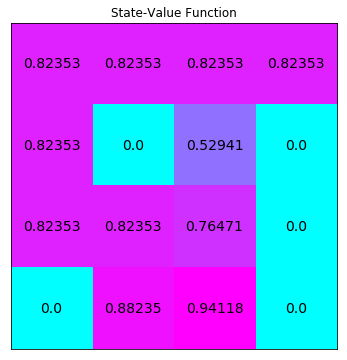

In [110]:
# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_tpi,"\n")

# plot the optimal state-value function
plot_values(V_tpi)

### Part 6: Value Iteration

In this section, you will write your own implementation of value iteration.

Your algorithm should accept three arguments as input:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used for the stopping criterion (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

In [111]:
import copy

def value_iteration(env, gamma=1, theta=1e-8):
    print('\nvalue_iteration start')    

    V = np.zeros(env.nS)
    
    # TODO: complete the function        
    iteration_count = 0    
    while True:
        iteration_count += 1
        
        max_delta = 0                    
        for s in range(env.nS):    
            old_V_s = V[s]
                
            action_vals = []
            for a in range(env.nA):                                                
                action_val = 0
                
                one_step_dynamics_a_given_s = env.P[s][a]
                for one_step_dynamic in one_step_dynamics_a_given_s:                                
                    prob_next_s_r_given_s_a, next_s, reward, done = one_step_dynamic                    
                    action_val += prob_next_s_r_given_s_a * (reward + gamma * V[next_s])
                    
                action_vals.append(action_val)
                
            V[s] = np.max(action_vals)
            
            delta_V_s = V[s] - old_V_s            
            max_delta = np.max([max_delta, np.abs(delta_V_s)])            
        
        print('value_iteration running, iteration_count =', iteration_count, ', V =', V)                                                            
        if max_delta < theta:
            print('max_delta < theta', max_delta, theta, ', finish \n')
            break

    
    policy = policy_improvement(env, V, gamma=gamma)            
    
    print('value_iteration finish')            
    print('policy\n', policy)        
    print('V\n', V)
    return policy, V

Run the code cell below to test your function.  If the code cell returns **PASSED**, then you have implemented the function correctly!  

**Note:** In order to ensure accurate results, make sure that the `value_iteration` function satisfies the requirements outlined above (with three inputs, two outputs, and with the default values of the input arguments unchanged).

In [112]:
check_test.run_check('value_iteration_check', value_iteration)


value_iteration start
value_iteration running, iteration_count = 1 , V = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.33333333 0.        ]
value_iteration running, iteration_count = 2 , V = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11111111 0.
 0.         0.11111111 0.48148148 0.        ]
value_iteration running, iteration_count = 3 , V = [0.         0.         0.         0.         0.         0.
 0.03703704 0.         0.         0.07407407 0.19753086 0.
 0.         0.22222222 0.56790123 0.        ]
value_iteration running, iteration_count = 4 , V = [0.         0.         0.01234568 0.00411523 0.         0.
 0.06995885 0.         0.02469136 0.14814815 0.26200274 0.
 0.         0.3127572  0.62688615 0.        ]
value_iteration running, iteration_count = 5 , V = [0.         0.00411523 0.02880658 0.01234568 0.00823045 0.
 0.0969

value_iteration running, iteration_count = 132 , V = [0.81275665 0.80922322 0.80676752 0.80551801 0.81384036 0.
 0.52206679 0.         0.81553751 0.8177137  0.75960965 0.
 0.         0.87831097 0.93911981 0.        ]
value_iteration running, iteration_count = 133 , V = [0.81311789 0.80970288 0.80732947 0.80612183 0.81416525 0.
 0.52231304 0.         0.81580549 0.8179087  0.75978052 0.
 0.         0.87844649 0.93918877 0.        ]
value_iteration running, iteration_count = 134 , V = [0.81346701 0.81016645 0.80787258 0.80670541 0.81447925 0.
 0.52255103 0.         0.81606448 0.81809716 0.75994565 0.
 0.         0.87857747 0.93925541 0.        ]
value_iteration running, iteration_count = 135 , V = [0.81380442 0.81061449 0.80839749 0.80726944 0.81478272 0.
 0.52278105 0.         0.81631479 0.8182793  0.76010526 0.
 0.         0.87870406 0.93931983 0.        ]
value_iteration running, iteration_count = 136 , V = [0.81413052 0.8110475  0.80890481 0.80781456 0.81507601 0.
 0.52300336 0.      

value_iteration running, iteration_count = 224 , V = [0.82306207 0.82290874 0.82280218 0.82274796 0.82310908 0.
 0.5290931  0.         0.8231827  0.82327711 0.76448479 0.
 0.         0.88217759 0.94108725 0.        ]
value_iteration running, iteration_count = 225 , V = [0.82307774 0.82292956 0.82282656 0.82277416 0.82312318 0.
 0.52910378 0.         0.82319433 0.82328557 0.7644922  0.
 0.         0.88218347 0.94109024 0.        ]
value_iteration running, iteration_count = 226 , V = [0.82309289 0.82294967 0.82285013 0.82279948 0.8231368  0.
 0.52911411 0.         0.82320556 0.82329374 0.76449936 0.
 0.         0.88218915 0.94109313 0.        ]
value_iteration running, iteration_count = 227 , V = [0.82310752 0.82296911 0.82287291 0.82282396 0.82314996 0.
 0.52912409 0.         0.82321642 0.82330165 0.76450629 0.
 0.         0.88219464 0.94109592 0.        ]
value_iteration running, iteration_count = 228 , V = [0.82312167 0.8229879  0.82289492 0.82284761 0.82316269 0.
 0.52913374 0.      

value_iteration running, iteration_count = 281 , V = [0.82346252 0.82344058 0.82342532 0.82341756 0.82346925 0.
 0.52936615 0.         0.82347979 0.8234933  0.76467424 0.
 0.         0.88232784 0.9411637  0.        ]
value_iteration running, iteration_count = 282 , V = [0.82346476 0.82344355 0.82342881 0.82342131 0.82347127 0.
 0.52936768 0.         0.82348145 0.82349451 0.7646753  0.
 0.         0.88232868 0.94116413 0.        ]
value_iteration running, iteration_count = 283 , V = [0.82346693 0.82344643 0.82343219 0.82342494 0.82347322 0.
 0.52936916 0.         0.82348306 0.82349568 0.76467632 0.
 0.         0.8823295  0.94116454 0.        ]
value_iteration running, iteration_count = 284 , V = [0.82346903 0.82344922 0.82343545 0.82342844 0.8234751  0.
 0.52937059 0.         0.82348461 0.82349681 0.76467731 0.
 0.         0.88233028 0.94116494 0.        ]
value_iteration running, iteration_count = 285 , V = [0.82347105 0.8234519  0.8234386  0.82343183 0.82347692 0.
 0.52937197 0.      

value_iteration running, iteration_count = 419 , V = [0.82352881 0.82352861 0.82352847 0.8235284  0.82352887 0.
 0.52941135 0.         0.82352896 0.82352909 0.7647056  0.
 0.         0.88235271 0.94117636 0.        ]
value_iteration running, iteration_count = 420 , V = [0.82352883 0.82352864 0.8235285  0.82352843 0.82352889 0.
 0.52941137 0.         0.82352898 0.8235291  0.76470561 0.
 0.         0.88235272 0.94117636 0.        ]
value_iteration running, iteration_count = 421 , V = [0.82352885 0.82352866 0.82352853 0.82352847 0.8235289  0.
 0.52941138 0.         0.82352899 0.82352911 0.76470562 0.
 0.         0.88235273 0.94117636 0.        ]
value_iteration running, iteration_count = 422 , V = [0.82352887 0.82352869 0.82352856 0.8235285  0.82352892 0.
 0.52941139 0.         0.82352901 0.82352912 0.76470562 0.
 0.         0.88235274 0.94117637 0.        ]
value_iteration running, iteration_count = 423 , V = [0.82352888 0.82352871 0.82352859 0.82352853 0.82352894 0.
 0.52941141 0.      

**<span style="color: green;">PASSED</span>**

Use the next code cell to solve the MDP and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

In [113]:
policy_vi, V_vi = value_iteration(env)


value_iteration start
value_iteration running, iteration_count = 1 , V = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.33333333 0.        ]
value_iteration running, iteration_count = 2 , V = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11111111 0.
 0.         0.11111111 0.48148148 0.        ]
value_iteration running, iteration_count = 3 , V = [0.         0.         0.         0.         0.         0.
 0.03703704 0.         0.         0.07407407 0.19753086 0.
 0.         0.22222222 0.56790123 0.        ]
value_iteration running, iteration_count = 4 , V = [0.         0.         0.01234568 0.00411523 0.         0.
 0.06995885 0.         0.02469136 0.14814815 0.26200274 0.
 0.         0.3127572  0.62688615 0.        ]
value_iteration running, iteration_count = 5 , V = [0.         0.00411523 0.02880658 0.01234568 0.00823045 0.
 0.0969

value_iteration running, iteration_count = 151 , V = [0.81789442 0.81604577 0.81476095 0.8141072  0.81846125 0.
 0.5255695  0.         0.81934896 0.82048725 0.76204002 0.
 0.         0.88023861 0.94010064 0.        ]
value_iteration running, iteration_count = 152 , V = [0.81808336 0.8162967  0.81505495 0.81442312 0.81863119 0.
 0.52569832 0.         0.81948914 0.82058925 0.76212941 0.
 0.         0.8803095  0.94013671 0.        ]
value_iteration running, iteration_count = 153 , V = [0.81826597 0.81653921 0.81533909 0.81472844 0.81879543 0.
 0.52582283 0.         0.81962461 0.82068784 0.7622158  0.
 0.         0.88037802 0.94017158 0.        ]
value_iteration running, iteration_count = 154 , V = [0.81844246 0.81677359 0.81561371 0.81502353 0.81895417 0.
 0.52594317 0.         0.81975554 0.82078312 0.76229929 0.
 0.         0.88044424 0.94020527 0.        ]
value_iteration running, iteration_count = 155 , V = [0.81861303 0.81700011 0.81587912 0.81530873 0.81910758 0.
 0.52605947 0.      

 0.         0.88229979 0.94114943 0.        ]
value_iteration running, iteration_count = 260 , V = [0.82339251 0.82334759 0.82331638 0.82330049 0.82340628 0.
 0.52931841 0.         0.82342785 0.8234555  0.76464111 0.
 0.         0.88230157 0.94115033 0.        ]
value_iteration running, iteration_count = 261 , V = [0.8233971  0.82335369 0.82332352 0.82330817 0.82341041 0.
 0.52932155 0.         0.82343125 0.82345798 0.76464329 0.
 0.         0.8823033  0.94115121 0.        ]
value_iteration running, iteration_count = 262 , V = [0.82340154 0.82335958 0.82333042 0.82331559 0.8234144  0.
 0.52932457 0.         0.82343454 0.82346038 0.76464539 0.
 0.         0.88230496 0.94115206 0.        ]
value_iteration running, iteration_count = 263 , V = [0.82340582 0.82336528 0.8233371  0.82332276 0.82341826 0.
 0.52932749 0.         0.82343773 0.82346269 0.76464741 0.
 0.         0.88230657 0.94115288 0.        ]
value_iteration running, iteration_count = 264 , V = [0.82340997 0.82337078 0.82334354

value_iteration running, iteration_count = 383 , V = [0.82352735 0.82352667 0.8235262  0.82352596 0.82352756 0.
 0.52941036 0.         0.82352788 0.8235283  0.76470491 0.
 0.         0.88235217 0.94117608 0.        ]
value_iteration running, iteration_count = 384 , V = [0.82352742 0.82352676 0.82352631 0.82352608 0.82352762 0.
 0.5294104  0.         0.82352793 0.82352834 0.76470494 0.
 0.         0.88235219 0.94117609 0.        ]
value_iteration running, iteration_count = 385 , V = [0.82352748 0.82352685 0.82352641 0.82352619 0.82352768 0.
 0.52941045 0.         0.82352798 0.82352837 0.76470497 0.
 0.         0.88235222 0.9411761  0.        ]
value_iteration running, iteration_count = 386 , V = [0.82352755 0.82352694 0.82352651 0.8235263  0.82352774 0.
 0.52941049 0.         0.82352803 0.82352841 0.764705   0.
 0.         0.88235224 0.94117611 0.        ]
value_iteration running, iteration_count = 387 , V = [0.82352761 0.82352702 0.82352661 0.8235264  0.82352779 0.
 0.52941054 0.      


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



/Users/rui/env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


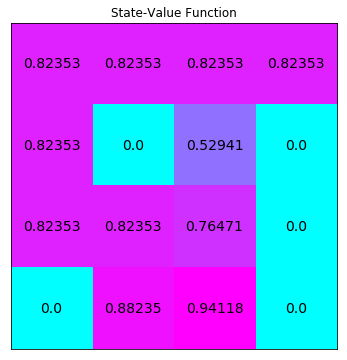

In [114]:
# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
plot_values(V_vi)